In [ ]:
!pip3 install sklearn

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem

In [2]:
data = pd.read_csv (r'dataset.csv')
PandasTools.AddMoleculeColumnToFrame(data,'SMILES','Molecule')

In [3]:
def mol2fp(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar
     
fp = mol2fp(Chem.MolFromSmiles(data.loc[1,"SMILES"]))

In [4]:
fp.reshape((64,-1))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [5]:
data["FPs"] = data.Molecule.apply(mol2fp)

In [6]:
X = np.stack(data.FPs.values)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]], dtype=int8)

In [7]:
y = data.pXC50.values.reshape((-1,1))
y

array([[6.85387],
       [6.37   ],
       [9.98297],
       ...,
       [6.60206],
       [6.8    ],
       [6.14   ]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

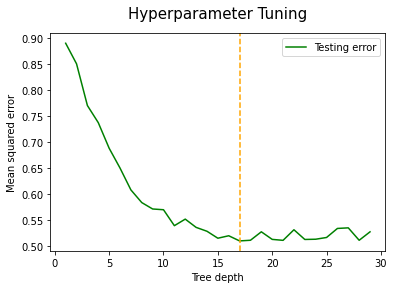

In [9]:
from sklearn.metrics import mean_squared_error as mse
max_depths = range(1, 30)
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=17, color='orange', linestyle='--')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_predicted = linear_model.predict(X_test)

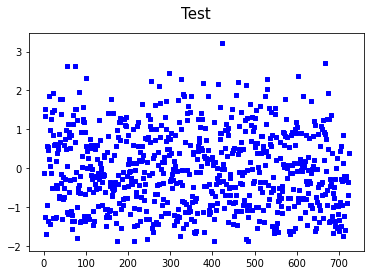

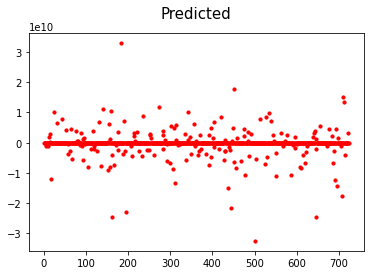

In [12]:
x = range(1,len(y_test)+1)
plt.scatter(x, y_test, s=10, c='b', marker="s")
plt.title('Test', pad=15, size=15)
plt.show()
plt.scatter(x, y_predicted, s=10, c='r', marker="o")
plt.title('Predicted', pad=15, size=15)
plt.show()